## OzDES Spectral Classification Tool

This is where I am going to try and develop a classification tool in order to determine the quality of the OzDES spectra before calibration.  The tables used here for training/testing were generated using the makeClassificationStats.py and classifySpec.py codes available in https://github.com/jhoormann/RMCodeDump.

In [1]:
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split

print(os.getcwd())

D:\Dropbox\OzDES_ReverberationMapping\ClassificationTest


In [2]:
import sklearn
sklearn.__version__

'0.20.0'

First I will read in and clean up the data

In [3]:
data = pd.read_csv("specDetsModel.csv")

In [7]:
data.head()

,ID,z,ext,date,mg,mgerr,Fvarg,mr,mrerr,Fvarr,...,SNR3000,F5100,SNR5100,Fred,SNRred,Fblue,SNRblue,badpix,class,issue
0,2925344542,0.37347,3,56598.600,19.469636,0.014603,0.00618,18.730544,0.008989,0.004178,...,8.455332,11.949564,45.648552,76.112506,52.326789,80.659277,67.363047,97,good,okay
1,2925344542,0.37347,6,56598.629,19.469636,0.014603,0.00618,18.730544,0.008989,0.004178,...,7.819644,12.593774,47.518343,78.443056,52.574403,79.813926,65.561255,95,good,okay
2,2925344542,0.37347,9,56598.658,19.469636,0.014603,0.00618,18.730544,0.008989,0.004178,...,7.155260,12.688696,42.284098,75.382128,44.669855,82.026930,57.572018,95,good,okay
3,2925344542,0.37347,12,56918.655,19.469636,0.014603,0.00618,18.730544,0.008989,0.004178,...,4.209890,13.431511,24.658220,86.121799,27.063870,96.609897,35.626317,53,good,okay
4,2925344542,0.37347,15,56918.684,19.469636,0.014603,0.00618,18.730544,0.008989,0.004178,...,4.476360,12.784952,17.731111,91.226388,21.654259,93.150786,26.263355,19,good,okay


In [8]:
data.describe()

,ID,z,ext,date,mg,mgerr,Fvarg,mr,mrerr,Fvarr,...,SNR1350,F3000,SNR3000,F5100,SNR5100,Fred,SNRred,Fblue,SNRblue,badpix
count,7.016000e+03,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,...,6868.000000,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000
mean,2.946905e+09,1.661833,125.728905,57431.628424,20.047027,0.020079,0.007686,19.802166,0.016169,0.006287,...,4.900873,17.208796,12.991900,1.047788,1.604373,202.039310,27.536700,140.841471,34.182643,348.720639
std,1.615798e+07,0.729112,89.114235,475.322673,0.819783,0.011390,0.003139,0.761851,0.008930,0.002602,...,10.518153,52.928026,17.901865,12.626905,6.822450,4158.544245,26.730478,637.926327,32.880181,1177.803611
min,2.925345e+09,0.139360,3.000000,56564.737000,17.833206,0.007315,0.003285,17.370223,0.005885,0.002751,...,-21.784225,-461.317904,-14.320007,-111.584218,-2.691519,-32742.827580,-116.752261,-34830.884420,-185.301683,10.000000
25%,2.938401e+09,1.162450,57.000000,56982.513000,19.589603,0.011950,0.005548,19.379146,0.009552,0.004463,...,0.000000,0.000000,0.000000,0.000000,0.000000,113.040182,10.230579,119.274155,13.005630,28.000000
50%,2.940131e+09,1.597090,114.000000,57368.561000,20.005298,0.015785,0.006967,19.799506,0.012908,0.005493,...,0.000000,21.056490,6.854154,0.000000,0.000000,131.517984,20.259320,139.627707,25.105021,37.000000
75%,2.970438e+09,1.984130,171.000000,57749.467000,20.569605,0.027211,0.009219,20.345632,0.020527,0.007783,...,5.396634,24.806317,18.801481,0.000000,0.000000,153.747936,36.224276,165.608570,44.667513,56.000000
max,2.971245e+09,4.557680,516.000000,58112.544000,22.377565,0.070911,0.018165,21.572749,0.049890,0.013945,...,257.929200,3823.255094,252.347091,1013.480920,67.869138,266741.101900,663.414460,34631.265930,845.316285,5000.000000


In [9]:
data.shape

(7016, 32)

In [4]:
colNames = data.columns
colNames

Index(['ID', 'z', 'ext', 'date', 'mg', 'mgerr', 'Fvarg', 'mr', 'mrerr',
       'Fvarr', 'mi', 'mierr', 'Fvari', 'Fc', 'SNRc', 'Fm', 'SNRm', 'Fh',
       'SNRh', 'F1350', 'SNR1350', 'F3000', 'SNR3000', 'F5100', 'SNR5100',
       'Fred', 'SNRred', 'Fblue', 'SNRblue', 'badpix', 'class', 'issue'],
      dtype='object')

In [11]:
pd.isnull(data).sum()

ID           0
z            0
ext          0
date         0
mg           0
mgerr        0
Fvarg        0
mr           0
mrerr        0
Fvarr        0
mi           0
mierr        0
Fvari        0
Fc           0
SNRc         0
Fm           0
SNRm         0
Fh           0
SNRh         0
F1350        0
SNR1350    148
F3000        0
SNR3000      0
F5100        0
SNR5100      0
Fred         0
SNRred       0
Fblue        0
SNRblue      0
badpix       0
class        0
issue        0
dtype: int64

In [12]:
data[pd.isnull(data['SNR1350']) == True][['ID', 'z', 'SNR1350', 'F1350']]

,ID,z,SNR1350,F1350
1099,2937789094,1.75478,NaN,0.0
1100,2937789094,1.75478,NaN,0.0
1101,2937789094,1.75478,NaN,0.0
1102,2937789094,1.75478,NaN,0.0
1103,2937789094,1.75478,NaN,0.0
1104,2937789094,1.75478,NaN,0.0
1105,2937789094,1.75478,NaN,0.0
1106,2937789094,1.75478,NaN,0.0
1107,2937789094,1.75478,NaN,0.0
1108,2937789094,1.75478,NaN,0.0


In [13]:
data[pd.isnull(data['SNR1350']) == True]['ID'].unique()

array([2937789094, 2971214955], dtype=int64)

In [14]:
data[pd.isnull(data['SNR1350']) == True]['z'].unique()

array([1.75478, 1.7496 ])

In [ ]:
1350*(1+1.75)

The fluxes are 0 and the bin is at the edge of the spectrograph so the values really shouldn't have been calculated in the first place.  I will replace them with 0

In [5]:
data['SNR1350'] = data['SNR1350'].fillna(0)
pd.isnull(data).sum()

ID         0
z          0
ext        0
date       0
mg         0
mgerr      0
Fvarg      0
mr         0
mrerr      0
Fvarr      0
mi         0
mierr      0
Fvari      0
Fc         0
SNRc       0
Fm         0
SNRm       0
Fh         0
SNRh       0
F1350      0
SNR1350    0
F3000      0
SNR3000    0
F5100      0
SNR5100    0
Fred       0
SNRred     0
Fblue      0
SNRblue    0
badpix     0
class      0
issue      0
dtype: int64

In [6]:
colNames = data.columns
features = colNames.drop(['ID', 'ext', 'class', 'issue'])

X = data[features]
y = data['class']

Now I am going to try a decision tree classifier

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
model_accuracies = []
for seed in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=seed)
    dtc = DecisionTreeClassifier(random_state = seed)
    dtc.fit(X_train, y_train)
    classifier_accuracy = dtc.score(X_test, y_test)
    model_accuracies.append(classifier_accuracy)


C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless bo

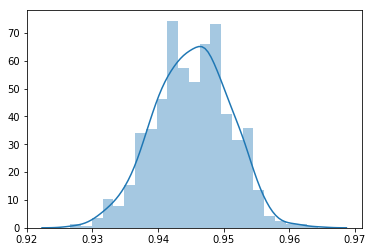

In [22]:
sb.distplot(model_accuracies)

In [23]:
from sklearn.model_selection import learning_curve
dtc = DecisionTreeClassifier(random_state=seed)
train_sizes, train_scores, val_scores = learning_curve(estimator = dtc,
                                                      X = X_train,
                                                      y = y_train,
                                                      train_sizes = np.linspace(0.1,1.0,20),
                                                      cv = 10,
                                                      n_jobs = 1)

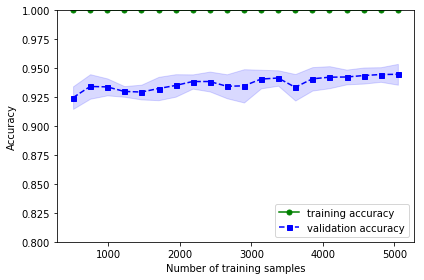

In [24]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='green', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='green')

plt.plot(train_sizes, val_mean,
         color='blue', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 val_mean + val_std,
                 val_mean - val_std,
                 alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1])
plt.tight_layout()
plt.show()

However, because the data sets for good/bad spectra are so uneaven accuracy curves are not necessarily reliable.  I will now plot the precision/recall curves and confusion matricies.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve
from inspect import signature
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib


In [26]:
def decisionTree(X_train, y_train, X_test, y_test, max_depth, max_features, features):
    
    dtc = DecisionTreeClassifier(random_state=seed)

    parameter_grid = {'max_depth':max_depth,
                     'max_features':max_features}

    skf = StratifiedKFold(n_splits=10, random_state=seed)
    cross_validation = skf.split(X_train, y_train)

    grid_search = GridSearchCV(dtc,
                              param_grid = parameter_grid,
                              cv = cross_validation)

    grid_search.fit(X_train, y_train)

    dtc = grid_search.best_estimator_
    
    print(grid_search.best_estimator_)
    print("\n")
    print(sorted(zip(dtc.feature_importances_, features), reverse=True))
    
    fig, ax = plt.subplots(1,3, figsize=(15, 5))
    
    y_test_mod = [0 if x == 'good' else 1 for x in y_test]
        
    y_score = dtc.predict_proba(X_test)
    
    # Plot Precision Recall Curve    
    precision, recall, _ = precision_recall_curve(y_test_mod, y_score[:,0])

    ax[0].plot(recall, precision, color='black')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title('Bad Recovery')
    
    y_test_modg = [1 if x == 'good' else 0 for x in y_test]
            
    # Plot Precision Recall Curve    
    precision, recall, _ = precision_recall_curve(y_test_modg, y_score[:,1])

    ax[1].plot(recall, precision, color='black')
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('Good Recovery')
    
    y_pred = dtc.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    labels = ['bad', 'good']
    df_cm = pd.DataFrame(cm, columns=labels, index=labels)
    sb.heatmap(df_cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 15})
    ax[2].set_xlabel('Predicted')
    ax[2].set_ylabel('Actual')
      
    fig.tight_layout()
    
    print('\nGood Recovery Precision: {0:0.2f}'.format(cm[1,1]/(cm[1,1] + cm[0,1])))
    print('Good Recovery Recall: {0:0.2f}'.format(cm[1,1]/(cm[1,1] + cm[1,0])))
    
    print('\nBad Recovery Precision: {0:0.2f}'.format(cm[0,0]/(cm[0,0] + cm[1,0])))
    print('Bad Recovery Recall: {0:0.2f}'.format(cm[0,0]/(cm[0,0] + cm[0,1])))
    
    plt.show()
    
    return 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=24, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=999,
            splitter='best')


[(0.31461140519450653, 'SNRc'), (0.29736835217898294, 'badpix'), (0.1552253341151087, 'Fm'), (0.12787633433646436, 'SNRred'), (0.042909870832197945, 'SNRblue'), (0.010030785317824536, 'F1350'), (0.007780502057315759, 'z'), (0.0074204568307812005, 'Fvari'), (0.005505239098770063, 'SNR5100'), (0.005002971745060545, 'SNR3000'), (0.004489152352946038, 'date'), (0.004267275222211969, 'mr'), (0.003991636393812004, 'mierr'), (0.0036634022400117796, 'SNR1350'), (0.0024786178674011754, 'SNRh'), (0.0017287011149968647, 'Fc'), (0.001641972525773452, 'Fblue'), (0.001613629040462829, 'F3000'), (0.0013894740516144344, 'SNRm'), (0.0010048874837568689, 'Fred'), 

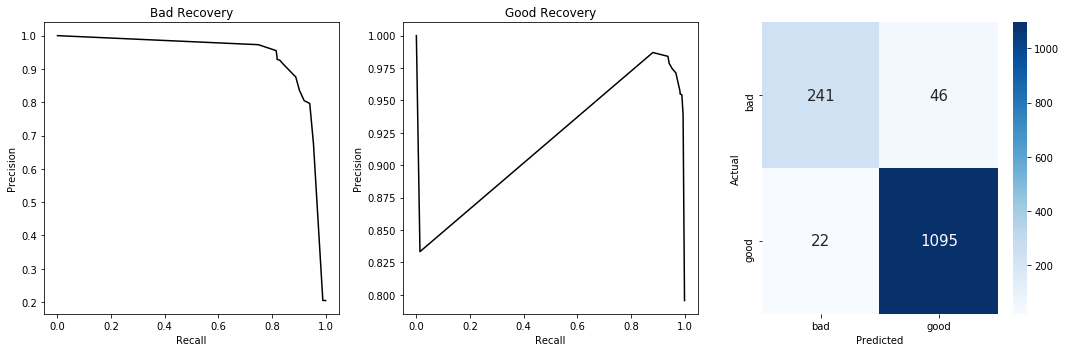

In [125]:
decisionTree(X_train, y_train, X_test, y_test, np.linspace(1,27,27).astype(int), np.linspace(1,27,27).astype(int))

This is looking pretty decent.  Because it takes some time to generate the files with all of these stats I am going to see if I can get comparable results even when eliminating features that were ranked as not very important

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=16, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=999,
            splitter='best')


[(0.3152940698445927, 'SNRc'), (0.2991564832825729, 'badpix'), (0.15284478585734698, 'SNRm'), (0.12329567402197801, 'SNRred'), (0.04419003394118537, 'SNRblue'), (0.012833224752977976, 'F1350'), (0.010760034659432701, 'z'), (0.007546247752382762, 'date'), (0.00551718473094026, 'SNR5100'), (0.005361957376292791, 'Fblue'), (0.005013827524283238, 'SNR3000'), (0.0049842314857614055, 'F3000'), (0.00398107333490432, 'Fred'), (0.0029093074259291586, 'mierr'), (0.002789463796167873, 'mr'), (0.002491414394187992, 'SNRh'), (0.0010309858190636462, 'Fvari'), (0.0, 'SNR1350'), (0.0, 'Fm'), (0.0, 'Fc')]

Good Recovery Precision: 0.96
Good Recovery Recall: 0.99


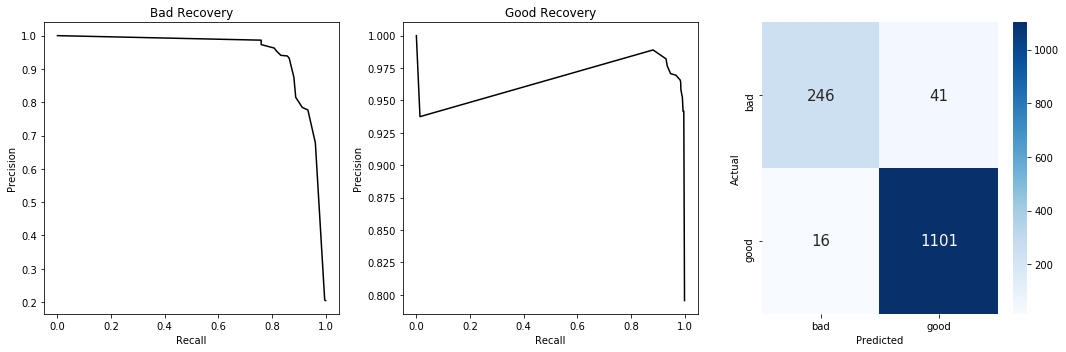

In [25]:
features2 = features.copy()
features2 = features2.drop(['mrerr', 'mi', 'mgerr', 'mg', 'Fvarr', 'Fvarg', 'Fh', 'F5100'])
decisionTree(X_train[features2], y_train, X_test[features2], y_test, np.linspace(1,9,9).astype(int), np.linspace(1,len(features2),len(features2)).astype(int), features2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=13, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=999,
            splitter='best')


[(0.3151003140387785, 'SNRc'), (0.30157948327724243, 'badpix'), (0.15366705955938567, 'SNRm'), (0.13287408009090707, 'SNRred'), (0.03884416095672599, 'SNRblue'), (0.011021032663291219, 'F1350'), (0.009449702253542589, 'SNR5100'), (0.00885896927604323, 'Fred'), (0.0076192036870147495, 'mr'), (0.007225999035405853, 'date'), (0.003641485112255177, 'Fblue'), (0.003572229330959456, 'F3000'), (0.002497359527915501, 'SNRh'), (0.0019335886944614356, 'z'), (0.0011730303942466388, 'SNR3000'), (0.0009423021018245724, 'mierr'), (0.0, 'Fvari')]

Good Recovery Precision: 0.96
Good Recovery Recall: 0.98

Bad Recovery Precision: 0.93
Bad Recovery Recall: 0.85


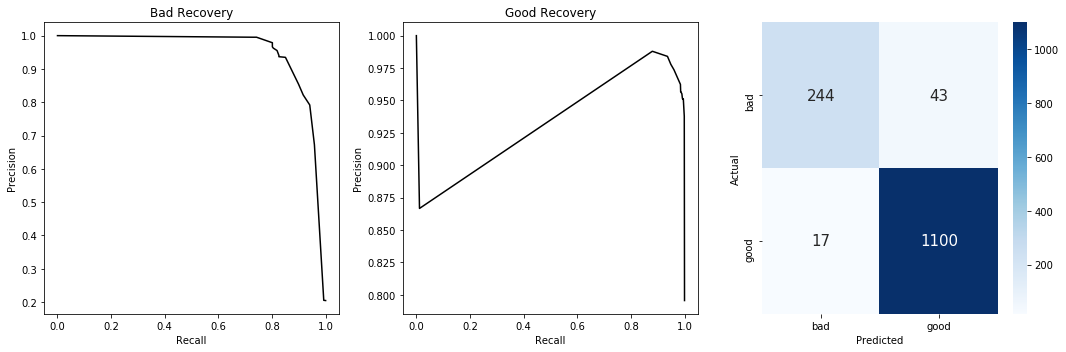

In [27]:
features3 = features2.copy()
features3 = features3.drop(['SNR1350', 'Fm', 'Fc'])
decisionTree(X_train[features3], y_train, X_test[features3], y_test, np.linspace(1,9,9).astype(int), np.linspace(1,len(features3),len(features3)).astype(int), features3)

This latest model seems to do a good job and also eliminates the need for some of the computation to get the stats for the analysis. I will save this one.

In [28]:
dt = joblib.load("DecisionTree.sav")
dt.score(X_test[features3], y_test)

0.9572649572649573

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=999, splitter='best')


[(0.31363824282718844, 'SNRc'), (0.3072114565503784, 'badpix'), (0.1668757348180062, 'SNRred'), (0.12930210420294808, 'SNRm'), (0.03217391087098121, 'SNRblue'), (0.0130903040881688, 'z'), (0.008673490287635977, 'F1350'), (0.008548930676382521, 'Fred'), (0.005784004123374593, 'date'), (0.004003157183297572, 'mierr'), (0.003512128210613679, 'SNR3000'), (0.003210620792721994, 'F3000'), (0.0030206164950155852, 'mr'), (0.0009552988732869206, 'SNR5100'), (0.0, 'SNRh'), (0.0, 'Fblue')]

Good Recovery Precision: 0.96
Good Recovery Recall: 0.99

Bad Recovery Precision: 0.94
Bad Recovery Recall: 0.84


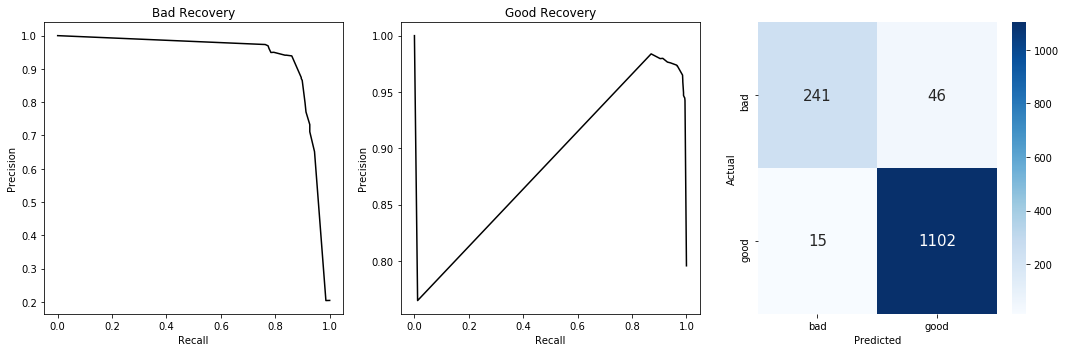

In [136]:
features4 = features3.copy()
features4 = features4.drop(['Fvari'])
decisionTree(X_train[features4], y_train, X_test[features4], y_test, np.linspace(1,9,9).astype(int), np.linspace(1,len(features4),len(features4)).astype(int), features4)

I am now going to try a random forest classifier.

In [35]:
def randomForest(X_train, y_train, X_test, y_test, max_depth, max_features, features):
    
    rfc = RandomForestClassifier(random_state = seed)

    parameter_grid = {'n_estimators':[5,10,25,50],
                     'criterion': ['gini','entropy'],
                     'max_features':  max_features,
                     'max_depth': max_depth,
                     'warm_start': [True, False]}
    skf = StratifiedKFold(n_splits=10, random_state=seed)
    cross_validation = skf.split(X_train, y_train)

    grid_search = GridSearchCV(rfc,
                              param_grid = parameter_grid,
                              cv = cross_validation)

    grid_search.fit(X_train, y_train)

    rfc = grid_search.best_estimator_
    
    print(grid_search.best_estimator_)
    print("\n")
    print(sorted(zip(rfc.feature_importances_, features), reverse=True))
    
    fig, ax = plt.subplots(1,3, figsize=(15, 5))
    
    y_test_mod = [0 if x == 'good' else 1 for x in y_test]
        
    y_score = rfc.predict_proba(X_test)
    
    # Plot Precision Recall Curve    
    precision, recall, _ = precision_recall_curve(y_test_mod, y_score[:,0])

    ax[0].plot(recall, precision, color='black')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title('Bad Recovery')
    
    y_test_modg = [1 if x == 'good' else 0 for x in y_test]
            
    # Plot Precision Recall Curve    
    precision, recall, _ = precision_recall_curve(y_test_modg, y_score[:,1])

    ax[1].plot(recall, precision, color='black')
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('Good Recovery')
    
    y_pred = rfc.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    labels = ['bad', 'good']
    df_cm = pd.DataFrame(cm, columns=labels, index=labels)
    sb.heatmap(df_cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 15})
    ax[2].set_xlabel('Predicted')
    ax[2].set_ylabel('Actual')
      
    fig.tight_layout()
    
    print('\nGood Recovery Precision: {0:0.2f}'.format(cm[1,1]/(cm[1,1] + cm[0,1])))
    print('Good Recovery Recall: {0:0.2f}'.format(cm[1,1]/(cm[1,1] + cm[1,0])))
    
    print('\nBad Recovery Precision: {0:0.2f}'.format(cm[0,0]/(cm[0,0] + cm[1,0])))
    print('Bad Recovery Recall: {0:0.2f}'.format(cm[0,0]/(cm[0,0] + cm[0,1])))
    
    fig.savefig("RandomForest_Diagnostic.png")
    joblib.dump(rfc, "RandomForest_Model.sav")
    
    plt.show()
    
    return 

In [14]:
colNames

Index(['ID', 'z', 'ext', 'date', 'mg', 'mgerr', 'Fvarg', 'mr', 'mrerr',
       'Fvarr', 'mi', 'mierr', 'Fvari', 'Fc', 'SNRc', 'Fm', 'SNRm', 'Fh',
       'SNRh', 'F1350', 'SNR1350', 'F3000', 'SNR3000', 'F5100', 'SNR5100',
       'Fred', 'SNRred', 'Fblue', 'SNRblue', 'badpix', 'class', 'issue'],
      dtype='object')

In [19]:
features

Index(['z', 'date', 'mg', 'mgerr', 'Fvarg', 'mr', 'mrerr', 'Fvarr', 'mi',
       'mierr', 'Fvari', 'Fc', 'SNRc', 'Fm', 'SNRm', 'Fh', 'SNRh', 'F1350',
       'SNR1350', 'F3000', 'SNR3000', 'F5100', 'SNR5100', 'Fred', 'SNRred',
       'Fblue', 'SNRblue', 'badpix'],
      dtype='object')

In [17]:
featuresRed = features.drop(['mg', 'mgerr', 'Fvarg', 'mr', 'mrerr', 'Fvarr', 'mi', 'mierr', 'Fvari'])
print(len(featuresRed))

19


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=999, verbose=0, warm_start=True)


[(0.21803680083597463, 'badpix'), (0.17414803446816968, 'SNRc'), (0.12313523448358837, 'SNRred'), (0.11560098610289313, 'SNRblue'), (0.08998916659719412, 'Fc'), (0.07882778107690412, 'SNRm'), (0.0675735138639437, 'Fm'), (0.022630111821226224, 'SNR3000'), (0.020707763926782852, 'SNR1350'), (0.018942665577677736, 'Fblue'), (0.017158674108072612, 'Fred'), (0.015654493546930884, 'date'), (0.01114672899727517, 'z'), (0.009280366011736041, 'F1350'), (0.006956510810935226, 'F3000'), (0.0033137343630516972, 'SNRh'), (0.0027703181923679583, 'Fh'), (0.002281968484610025, 'SNR5100'), (0.001845146

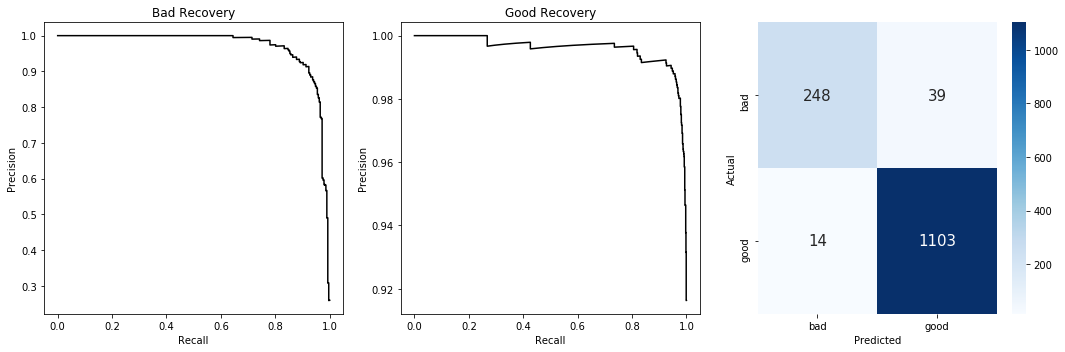

In [36]:
randomForest(X_train[featuresRed], y_train, X_test[featuresRed], y_test, np.linspace(1,10,10).astype(int), np.linspace(1,10,10).astype(int), featuresRed)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=999,
            splitter='best')


[(0.3170341033853122, 'SNRc'), (0.30125688552526836, 'badpix'), (0.15573516225308762, 'SNRm'), (0.13322592578327794, 'SNRred'), (0.029378939769435643, 'SNRblue'), (0.015840820711615362, 'F1350'), (0.010127785053389316, 'SNR5100'), (0.006323880108627797, 'SNR3000'), (0.006199782403971106, 'F3000'), (0.0051203903195077465, 'SNR1350'), (0.0044519711582649, 'date'), (0.0038573503768679755, 'Fred'), (0.003707897159021568, 'Fblue'), (0.0029307368870416873, 'SNRh'), (0.002501023111297068, 'Fh'), (0.0023073459940136814, 'z'), (0.0, 'Fm'), (0.0, 'Fc'), (0.0, 'F5100')]

Good Recovery Precision: 0.96
Good Recovery Recall: 0.98

Bad Recovery Precision: 0.93


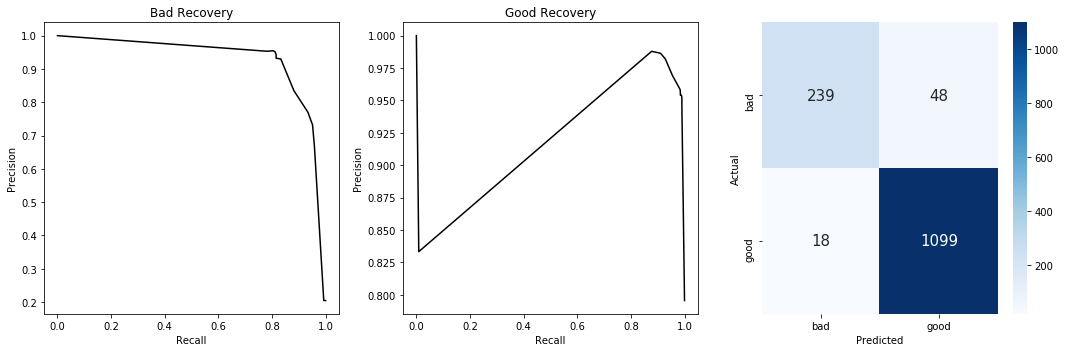

In [20]:
decisionTree(X_train[featuresRed], y_train, X_test[featuresRed], y_test, np.linspace(1,10,10).astype(int), np.linspace(1,10,10).astype(int), featuresRed)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=999,
            splitter='best')


[(0.3267507089642992, 'SNRc'), (0.2589130739913539, 'SNRred'), (0.19584742123527427, 'badpix'), (0.1361049231661582, 'SNRm'), (0.03361232745435903, 'SNRblue'), (0.016861744500120505, 'SNR1350'), (0.008387584741511297, 'SNR3000'), (0.008041233984081748, 'F1350'), (0.005012982549392692, 'F5100'), (0.003216929740448142, 'SNRh'), (0.0025896147510247455, 'Fh'), (0.002211639196558098, 'date'), (0.0011759115482007356, 'Fc'), (0.0009952376384511441, 'z'), (0.00027866653876632003, 'Fred'), (0.0, 'SNR5100'), (0.0, 'Fm'), (0.0, 'Fblue'), (0.0, 'F3000')]

Good Recovery Precision: 0.96
Good Recovery Recall: 0.99

Bad Recovery Precision: 0.94
Bad Recovery Reca

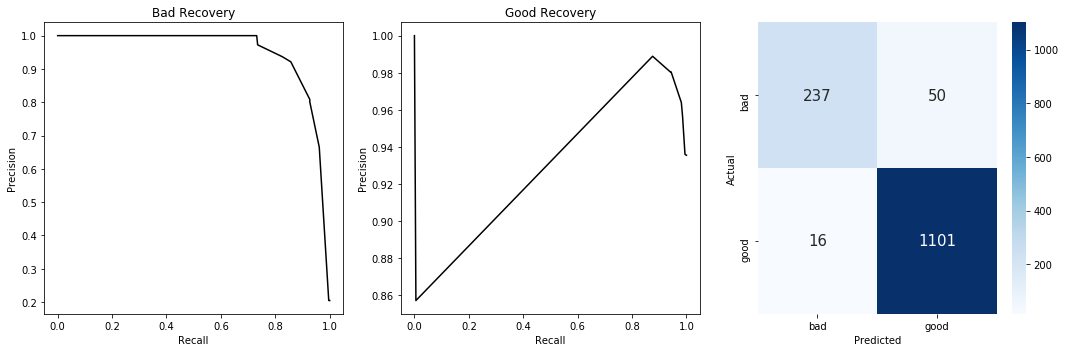

In [21]:
decisionTree(X_train[featuresRed], y_train, X_test[featuresRed], y_test, np.linspace(1,19,19).astype(int), np.linspace(1,19,19).astype(int), featuresRed)

It also looks like it is doing a pretty good job.  I still want to check how much better this does than some simple cuts on quality flags and negative line/band fluxes.

In [37]:
model = joblib.load("RandomForest_Model.sav")

print(featuresRed)

model.feature_importances_

Index(['z', 'date', 'Fc', 'SNRc', 'Fm', 'SNRm', 'Fh', 'SNRh', 'F1350',
       'SNR1350', 'F3000', 'SNR3000', 'F5100', 'SNR5100', 'Fred', 'SNRred',
       'Fblue', 'SNRblue', 'badpix'],
      dtype='object')


array([0.01114673, 0.01565449, 0.08998917, 0.17414803, 0.06757351,
       0.07882778, 0.00277032, 0.00331373, 0.00928037, 0.02070776,
       0.00695651, 0.02263011, 0.00184515, 0.00228197, 0.01715867,
       0.12313523, 0.01894267, 0.11560099, 0.2180368 ])

In [39]:
data['Predict'] = model.predict(data[featuresRed])

In [53]:
notGoods = data[(data['Predict'] == 'good') & (data['class'] == 'bad')][['ID', 'ext','issue']]
notGoods.to_csv("notGoods.txt")

In [52]:
notBads = data[(data['Predict'] == 'bad') & (data['class'] == 'good')][['ID', 'ext','issue']]
print(notBads.shape)
notBads.to_csv("notBads.txt")

(28, 3)


In [54]:
data[data['issue']=='splice'][['Predict', 'class']]

,Predict,class
57,good,bad
70,good,bad
142,good,bad
639,good,bad
640,good,bad
762,good,bad
1099,good,bad
1424,bad,bad
1425,bad,bad
1426,bad,bad
